In [1]:
# Widen width of notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

from datetime import timedelta
from scipy.sparse import csr_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
# train = pd.read_csv('train_features.csv')
# test= pd.read_csv('test_features.csv')
data1=pd.read_csv('df_continent_3.csv')
data2=pd.read_csv('df_country_3.csv')

In [2]:
data1.drop(columns=['POSTED_DATE'],inplace=True)
data2.drop(columns=['POSTED_DATE'],inplace=True)

In [3]:
data1.head()

,LOAN_AMOUNT,STATUS,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,BORROWER_PICTURED,LEN_DESCRIPTION,LEN_TAGS,Agriculture,Arts,Clothing,Construction,Education,Entertainment,Food,Health,Housing,Manufacturing,Personal Use,Retail,Services,Transportation,Wholesale,DAYS_TO_EXPIRE,MALE_BORROWERS,FEMALE_BORROWERS,partner_rating,time_on_kiva,total_loans,are_interest_fees_charged,avg_cost_to_borrower,profitability_ROA,avg_loan_size,delinquency_rate,loans_at_risk_rate,default_rate,emo_score,Africa,Asia,North America,Europe,South America,Oceania
0,1100.0,1,14.0,4,1,1,617,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,31.0,1,0,2.5,131.0,15029975.0,1,47.0,1.0,66.7,31.72,45.79,0.61,0.7845,1,0,0,0,0,0
1,500.0,1,14.0,4,1,1,334,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,32.0,0,1,2.0,140.0,15969225.0,1,36.0,4.0,34.9,8.28,10.96,2.78,0.9423,1,0,0,0,0,0
2,550.0,1,14.0,1,1,1,592,6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,32.0,1,0,3.0,105.0,11134150.0,1,51.0,1.6,162.0,31.43,48.43,0.70,0.9559,1,0,0,0,0,0
3,550.0,1,12.0,4,1,1,651,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,30.0,1,0,3.0,105.0,11134150.0,1,51.0,1.6,162.0,31.43,48.43,0.70,0.9571,1,0,0,0,0,0
4,600.0,1,20.0,18,1,1,466,6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,38.0,0,1,4.5,113.0,24611150.0,1,29.0,3.4,37.6,5.97,8.59,1.25,0.9246,0,0,1,0,0,0


In [4]:
data2.head()

,LOAN_AMOUNT,STATUS,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,BORROWER_PICTURED,LEN_DESCRIPTION,LEN_TAGS,Agriculture,Arts,Clothing,Construction,Education,Entertainment,Food,Health,Housing,Manufacturing,Personal Use,Retail,Services,Transportation,Wholesale,Albania,Armenia,Bangladesh,Bolivia,Brazil,Burkina Faso,Cambodia,Cameroon,Colombia,Congo,Costa Rica,Dominican Republic,Ecuador,Egypt,El Salvador,Fiji,Georgia,Ghana,Guatemala,Haiti,Honduras,India,Indonesia,Israel,Jordan,Kenya,Kosovo,Kyrgyzstan,Lebanon,Lesotho,Liberia,Madagascar,Malawi,Mali,Mexico,Moldova,Mozambique,Namibia,Nepal,Nicaragua,Nigeria,Pakistan,Palestine,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Puerto Rico,Rwanda,Samoa,Senegal,Sierra Leone,Solomon Islands,Tajikistan,Tanzania,Thailand,The Democratic Republic of the Congo,Timor-Leste,Togo,Tonga,Turkey,Uganda,United States,Vietnam,Zambia,Zimbabwe,DAYS_TO_EXPIRE,MALE_BORROWERS,FEMALE_BORROWERS,partner_rating,time_on_kiva,total_loans,are_interest_fees_charged,avg_cost_to_borrower,profitability_ROA,avg_loan_size,delinquency_rate,loans_at_risk_rate,default_rate,emo_score
0,1100.0,1,14.0,4,1,1,617,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,31.0,1,0,2.5,131.0,15029975.0,1,47.0,1.0,66.7,31.72,45.79,0.61,0.7845
1,500.0,1,14.0,4,1,1,334,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32.0,0,1,2.0,140.0,15969225.0,1,36.0,4.0,34.9,8.28,10.96,2.78,0.9423
2,550.0,1,14.0,1,1,1,592,6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,32.0,1,0,3.0,105.0,11134150.0,1,51.0,1.6,162.0,31.43,48.43,0.70,0.9559
3,550.0,1,12.0,4,1,1,651,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,30.0,1,0,3.0,105.0,11134150.0,1,51.0,1.6,162.0,31.43,48.43,0.70,0.9571
4,600.0,1,20.0,18,1,1,466,6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38.0,0,1,4.5,113.0,24611150.0,1,29.0,3.4,37.6,5.97,8.59,1.25,0.9246


In [3]:
#Prepare X and Y
X1 = data1.drop(columns=['STATUS'])
X1 = data1.drop(columns=['STATUS'])
y1 = data1.STATUS
y1 = data1.STATUS

X2 = data2.drop(columns=['STATUS'])
X2= data2.drop(columns=['STATUS'])
y2 = data2.STATUS
y2= data2.STATUS

In [4]:
#train test split
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=7)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=7)

In [5]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled1=scaler.fit_transform(X_train1)
X_test_scaled1=scaler.transform(X_test1)

X_train_scaled2=scaler.fit_transform(X_train2)
X_test_scaled2=scaler.transform(X_test2)

In [6]:
#Resampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

In [7]:
#Random over sampling
ros = RandomOverSampler()
X_train_resampled1, y_train_resampled1 = ros.fit_resample(X_train_scaled1, y_train1)
X_train_resampled2, y_train_resampled2 = ros.fit_resample(X_train_scaled2, y_train2)

In [8]:
counter1 = Counter(y_train_resampled1)
print(counter1)

counter2 = Counter(y_train_resampled2)
print(counter2)

Counter({0: 162419, 1: 162419})
Counter({0: 162419, 1: 162419})


# Logistic Regression (Continent)

In [13]:
from sklearn.linear_model import  LogisticRegression
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train_resampled1, y_train_resampled1)

LogisticRegression(max_iter=10000)

In [14]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
predictions= lr.predict(X_test_scaled1)
print('MAE:', metrics.mean_absolute_error(y_test1, predictions))
print('MSE:', metrics.mean_squared_error(y_test1, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, predictions)))
print('R^2 = ', lr.score(X_test_scaled1, y_test1))
print(confusion_matrix(y_test1,predictions))
print(classification_report(y_test1, predictions))

MAE: 0.09958040033934835
MSE: 0.09958040033934835
RMSE: 0.31556362328276744
R^2 =  0.9004195996606517
[[36576  4012]
 [  331  2694]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     40588
           1       0.40      0.89      0.55      3025

    accuracy                           0.90     43613
   macro avg       0.70      0.90      0.75     43613
weighted avg       0.95      0.90      0.92     43613



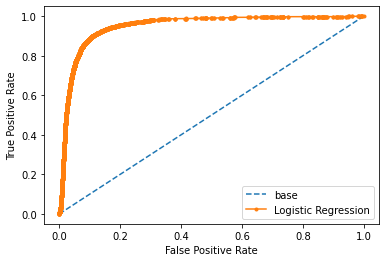

In [64]:
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test1))]

# predict probabilities
lr_probs = lr.predict_proba(X_test_scaled1)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test1, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test1, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='base')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


In [65]:
roc_auc_score(y_test1, lr_probs)

0.9493792245723404

In [66]:
print(lr.intercept_) 

[-2.47323052]


In [67]:
feature=X_train1.columns[:]
values=lr.coef_.round(4)

In [68]:
#Feature importance
for i in range(40):
    print(feature[i] + "=" + str(values[0,i]))

LOAN_AMOUNT=4.5163
LENDER_TERM=0.901
NUM_LENDERS_TOTAL=-5.529
NUM_JOURNAL_ENTRIES=-1.9906
BORROWER_PICTURED=0.4519
LEN_DESCRIPTION=-0.0529
LEN_TAGS=0.659
Agriculture=0.2017
Arts=-0.329
Clothing=0.159
Construction=-0.0459
Education=-0.8986
Entertainment=-0.0489
Food=0.2036
Health=0.0264
Housing=-0.1624
Manufacturing=-0.4099
Personal Use=-0.2278
Retail=0.4208
Services=0.0614
Transportation=0.0163
Wholesale=0.0154
DAYS_TO_EXPIRE=-0.0231
MALE_BORROWERS=4.6158
FEMALE_BORROWERS=4.0831
partner_rating=0.0904
time_on_kiva=0.205
total_loans=-0.3395
are_interest_fees_charged=-0.1842
avg_cost_to_borrower=0.1723
profitability_ROA=0.1795
avg_loan_size=0.068
delinquency_rate=0.1303
loans_at_risk_rate=0.0046
default_rate=0.2621
emo_score=0.0151
Africa=0.0752
Asia=0.1027
North America=-0.0495
Europe=-0.081


In [69]:
#Feature importance from Shap
import shap
explainer = shap.LinearExplainer(lr, X_test_scaled1)
shap_values = explainer.shap_values(X_test_scaled1)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


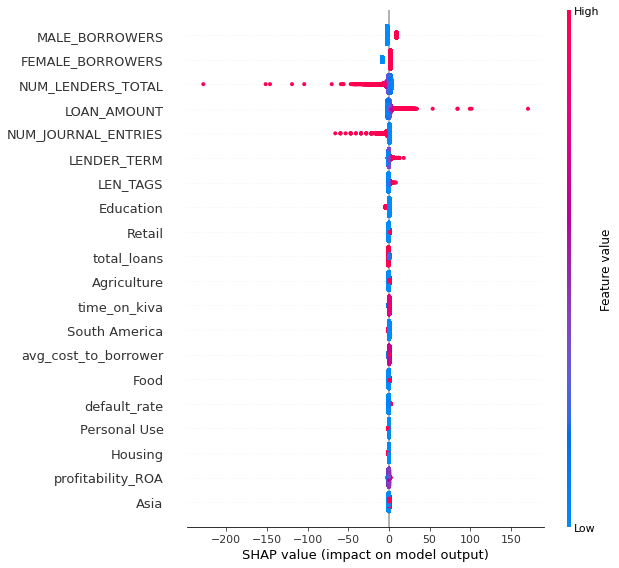

In [70]:
#global
shap.summary_plot(shap_values, features=X_test_scaled1, feature_names=feature)

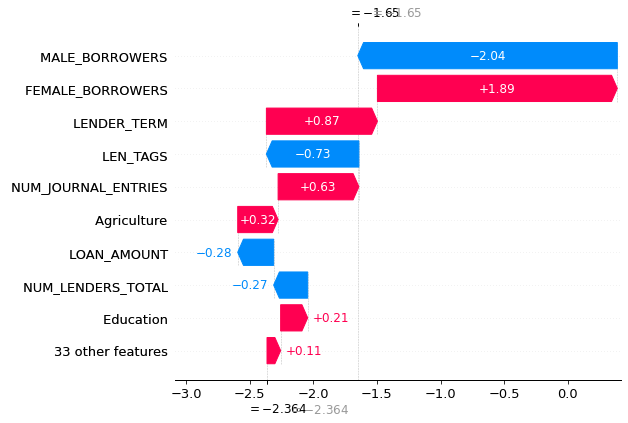

In [71]:
#local
sample_ind = 10
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[sample_ind], X1.iloc[sample_ind])

# Logistic Regression (Country)

In [52]:
from sklearn.linear_model import  LogisticRegression
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train_resampled2, y_train_resampled2)

LogisticRegression(max_iter=10000)

In [53]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
predictions= lr.predict(X_test_scaled2)
print('MAE:', metrics.mean_absolute_error(y_test2, predictions))
print('MSE:', metrics.mean_squared_error(y_test2, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, predictions)))
print('R^2 = ', lr.score(X_test_scaled2, y_test2))
print(confusion_matrix(y_test2,predictions))
print(classification_report(y_test2, predictions))

MAE: 0.10586293077752046
MSE: 0.10586293077752046
RMSE: 0.3253658414423992
R^2 =  0.8941370692224795
[[36222  4366]
 [  251  2774]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     40588
           1       0.39      0.92      0.55      3025

    accuracy                           0.89     43613
   macro avg       0.69      0.90      0.74     43613
weighted avg       0.95      0.89      0.91     43613



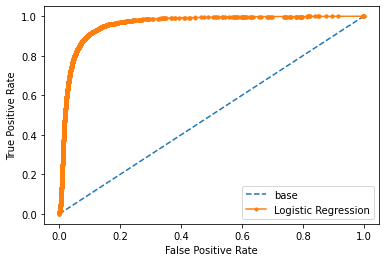

In [54]:
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test2))]

# predict probabilities
lr_probs = lr.predict_proba(X_test_scaled2)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test2, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test2, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='base')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


In [55]:
roc_auc_score(y_test2, lr_probs)

0.9591468960006906

In [56]:
print(lr.intercept_) 

[-4.6392319]


In [57]:
feature=X_train2.columns[:]
values=lr.coef_.round(4)

In [58]:
#Feature importance
for i in range(101):
    print(feature[i] + "=" + str(values[0,i]))

LOAN_AMOUNT=4.5563
LENDER_TERM=0.8877
NUM_LENDERS_TOTAL=-5.3945
NUM_JOURNAL_ENTRIES=-3.049
BORROWER_PICTURED=0.4087
LEN_DESCRIPTION=-0.3476
LEN_TAGS=0.6251
Agriculture=0.1709
Arts=-0.3202
Clothing=0.1607
Construction=-0.0283
Education=-0.923
Entertainment=-0.034
Food=0.2178
Health=-0.1111
Housing=-0.0924
Manufacturing=-0.3729
Personal Use=-0.2144
Retail=0.4365
Services=0.0513
Transportation=-0.0053
Wholesale=0.007
Albania=0.1011
Armenia=-0.1134
Bangladesh=0.003
Bolivia=0.1018
Brazil=0.165
Burkina Faso=0.0594
Cambodia=0.2609
Cameroon=0.0812
Colombia=0.6831
Congo=0.0018
Costa Rica=-0.1306
Dominican Republic=0.1571
Ecuador=0.0273
Egypt=-0.0634
El Salvador=0.3347
Fiji=0.1952
Georgia=-0.0077
Ghana=0.1905
Guatemala=0.2473
Haiti=0.1143
Honduras=0.0895
India=-1.2691
Indonesia=-0.7048
Israel=-0.3863
Jordan=0.3975
Kenya=1.0215
Kosovo=0.0535
Kyrgyzstan=0.2233
Lebanon=0.5543
Lesotho=-0.2831
Liberia=-0.8572
Madagascar=-1.1453
Malawi=-0.9145
Mali=0.2672
Mexico=0.3158
Moldova=0.0691
Mozambique=-0.192

In [59]:
#Feature importance using Shap
import shap
explainer = shap.LinearExplainer(lr, X_test_scaled2)
shap_values = explainer.shap_values(X_test_scaled2)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


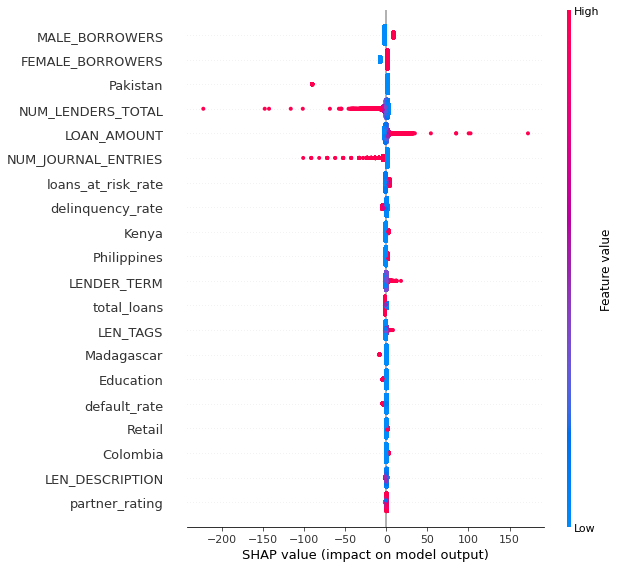

In [60]:
#global
shap.summary_plot(shap_values, features=X_test_scaled2, feature_names=feature)

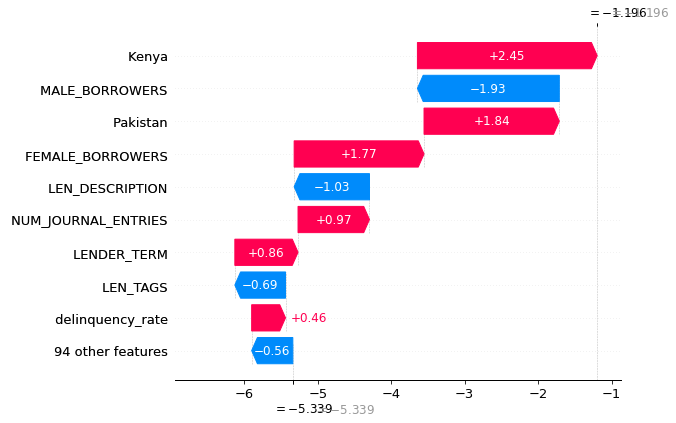

In [61]:
#local
sample_ind = 10
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[sample_ind], X2.iloc[sample_ind])

# Gaussian Bayes Model (continent)

In [72]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [73]:
# train the model
%time clf.fit(X_train_resampled1, y_train_resampled1)

Wall time: 474 ms


GaussianNB()

In [74]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
predictions_g= clf.predict(X_test_scaled1)
print('MAE:', metrics.mean_absolute_error(y_test1, predictions_g))
print('MSE:', metrics.mean_squared_error(y_test1, predictions_g))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, predictions_g)))
print('R^2 = ', clf.score(X_test_scaled1, y_test1))
print(confusion_matrix(y_test1,predictions_g))
print(classification_report(y_test1, predictions_g))

MAE: 0.5211060922202095
MSE: 0.5211060922202095
RMSE: 0.7218767846524845
R^2 =  0.4788939077797904
[[18043 22545]
 [  182  2843]]
              precision    recall  f1-score   support

           0       0.99      0.44      0.61     40588
           1       0.11      0.94      0.20      3025

    accuracy                           0.48     43613
   macro avg       0.55      0.69      0.41     43613
weighted avg       0.93      0.48      0.58     43613



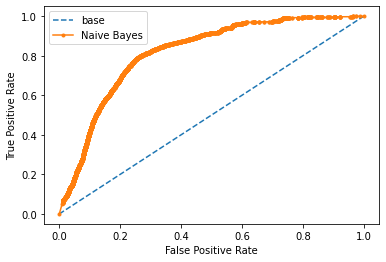

In [75]:
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test1))]

# predict probabilities
gb_probs = clf.predict_proba(X_test_scaled1)
# keep probabilities for the positive outcome only
gb_probs = gb_probs[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test1, ns_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test1, gb_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='base')
pyplot.plot(gb_fpr, gb_tpr, marker='.', label='Naive Bayes')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


In [76]:
roc_auc_score(y_test1, gb_probs)

0.8160640648581553

# Gaussian Bayes Model (country)

In [77]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [78]:
# train the model
%time clf.fit(X_train_resampled2, y_train_resampled2)

Wall time: 1.06 s


GaussianNB()

In [79]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
predictions_g= clf.predict(X_test_scaled2)
print('MAE:', metrics.mean_absolute_error(y_test2, predictions_g))
print('MSE:', metrics.mean_squared_error(y_test2, predictions_g))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, predictions_g)))
print('R^2 = ', clf.score(X_test_scaled2, y_test2))
print(confusion_matrix(y_test2,predictions_g))
print(classification_report(y_test2, predictions_g))

MAE: 0.7297136174993695
MSE: 0.7297136174993695
RMSE: 0.8542327654096216
R^2 =  0.27028638250063053
[[ 8784 31804]
 [   21  3004]]
              precision    recall  f1-score   support

           0       1.00      0.22      0.36     40588
           1       0.09      0.99      0.16      3025

    accuracy                           0.27     43613
   macro avg       0.54      0.60      0.26     43613
weighted avg       0.93      0.27      0.34     43613



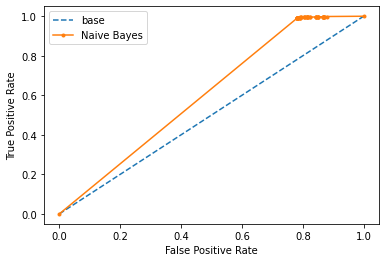

In [80]:
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test2))]

# predict probabilities
gb_probs = clf.predict_proba(X_test_scaled2)
# keep probabilities for the positive outcome only
gb_probs = gb_probs[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test2, ns_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test2, gb_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='base')
pyplot.plot(gb_fpr, gb_tpr, marker='.', label='Naive Bayes')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [81]:
roc_auc_score(y_test2, gb_probs)

0.6050010099471651

# K nearest neighbour

In [16]:
#Getting best number of neighbours to use

In [109]:
error_rate = []
for i in range(1,30):
    %time knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_resampled1, y_train_resampled1)
    pred_i = knn.predict(X_test_scaled1)
    error_rate.append(np.mean(pred_i != y_test1)) #avg of predicted value compare to actual y value

Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns
Wall time: 1.01 ms
Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns
Wall time: 999 µs
Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns
Wall time: 0 ns


In [110]:
print(error_rate)

[0.05273656937151767, 0.05273656937151767, 0.06491183821337675, 0.06491183821337675, 0.07995322495586178, 0.07995322495586178, 0.09476532226629675, 0.09474239332309174, 0.10879783550776145, 0.10859147501891638, 0.12090431752000551, 0.12033109393988031, 0.13250636278173938, 0.13147456033751403, 0.14248045307591772, 0.13947676151606173, 0.15002407539036525, 0.1471350285465343, 0.1561461032261023, 0.15156031458510077, 0.16020452617338868, 0.1534404879279114, 0.161213399674409, 0.15417421411047164, 0.16155733382248413, 0.15360099053034645, 0.16077774975351386, 0.15460986403136678, 0.16086946552633388]


Text(0, 0.5, 'Error Rate')

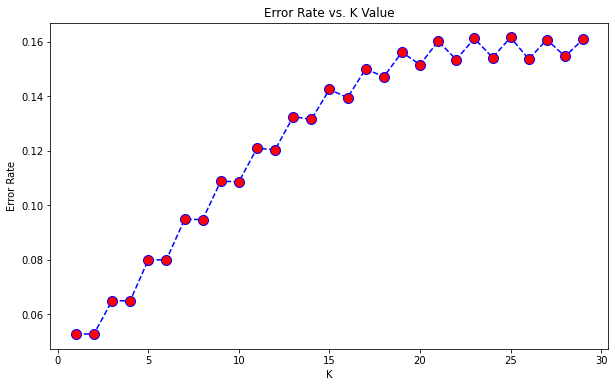

In [112]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')    #add title 
plt.xlabel('K')                                     # add x label
plt.ylabel('Error Rate')                     #add y label


In [17]:
#Use best n to run again

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [12]:
%time knn.fit(X_train_resampled1, y_train_resampled1)
pred = knn.predict(X_test_scaled1)

Wall time: 37.9 ms


In [13]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
print('MAE:', metrics.mean_absolute_error(y_test1, pred))
print('MSE:', metrics.mean_squared_error(y_test1, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, pred)))
print('R^2 = ', knn.score(X_test1, y_test1))
print(confusion_matrix(y_test1,pred))
print(classification_report(y_test1, pred))

MAE: 0.05273656937151767
MSE: 0.05273656937151767
RMSE: 0.22964444119446406
R^2 =  0.9306399468048517
[[39502  1086]
 [ 1214  1811]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     40588
           1       0.63      0.60      0.61      3025

    accuracy                           0.95     43613
   macro avg       0.80      0.79      0.79     43613
weighted avg       0.95      0.95      0.95     43613



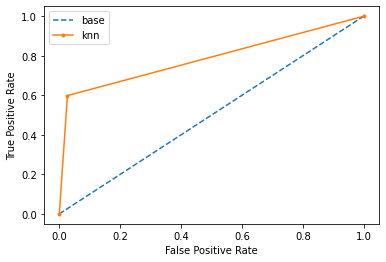

In [14]:
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test1))]

# predict probabilities
knn_probs = knn.predict_proba(X_test_scaled1)
# keep probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test1, ns_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test1, knn_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='base')
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='knn')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


In [15]:
roc_auc_score(y_test1, knn_probs)

0.7859605045500563